In [4]:
import pandas as pd
train = pd.read_csv("train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.shape

(614, 13)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# checking for missing values
train.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
train.describe() #descriptive statistics

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train.describe(include=[object])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [10]:
# dropping PassengerId, Name and Ticket
train = train.drop(['Loan_ID'], axis=1)

In [11]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


<Axes: xlabel='Loan_Status', ylabel='count'>

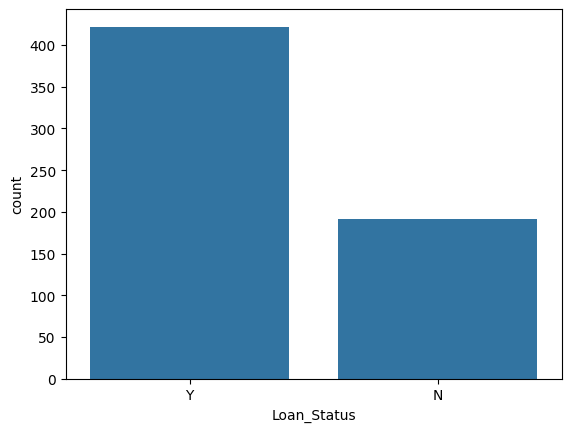

In [12]:
import seaborn as sns
sns.countplot(x=train['Loan_Status'])

In [13]:
train['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


<Axes: xlabel='Gender', ylabel='count'>

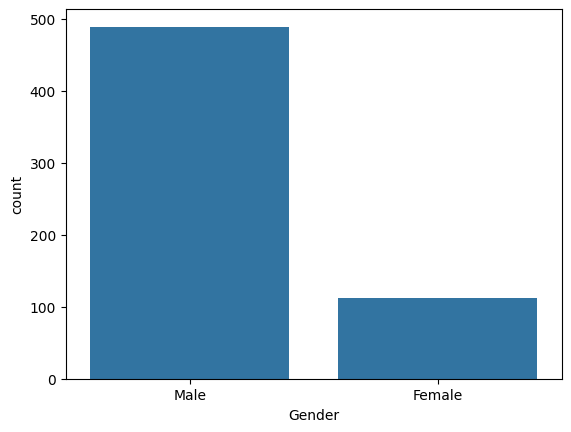

In [14]:
sns.countplot(x=train['Gender'])

<Axes: xlabel='Gender', ylabel='count'>

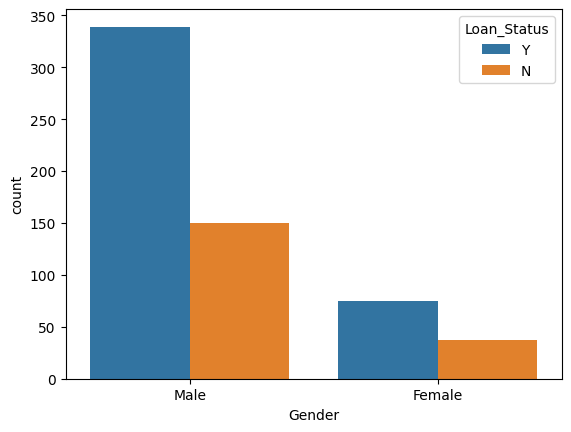

In [15]:
sns.countplot(x=train['Gender'], hue=train['Loan_Status'])

<Axes: xlabel='Married', ylabel='count'>

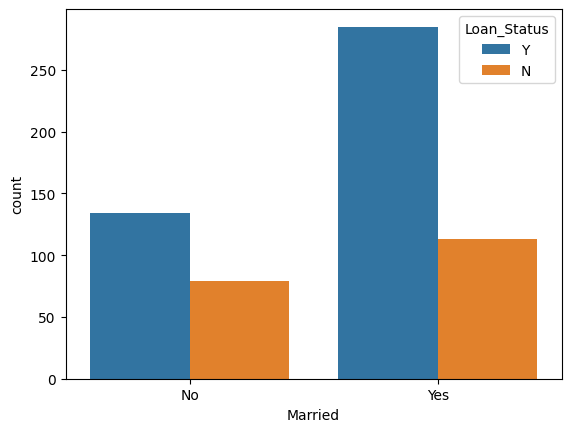

In [16]:
sns.countplot(x='Married', data=train, hue='Loan_Status')

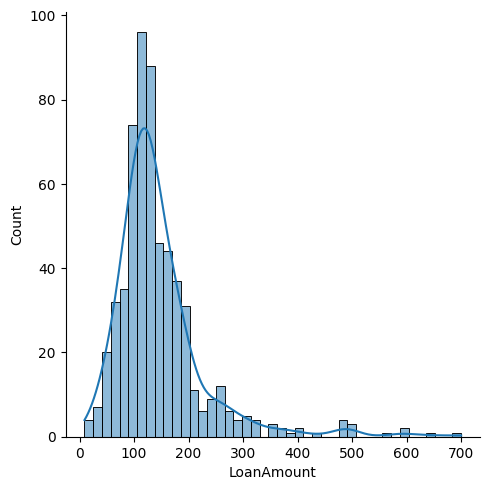

In [17]:
sns.displot(train['LoanAmount'], kde=True)

In [18]:
train['LoanAmount'].skew()

np.float64(2.677551679256059)

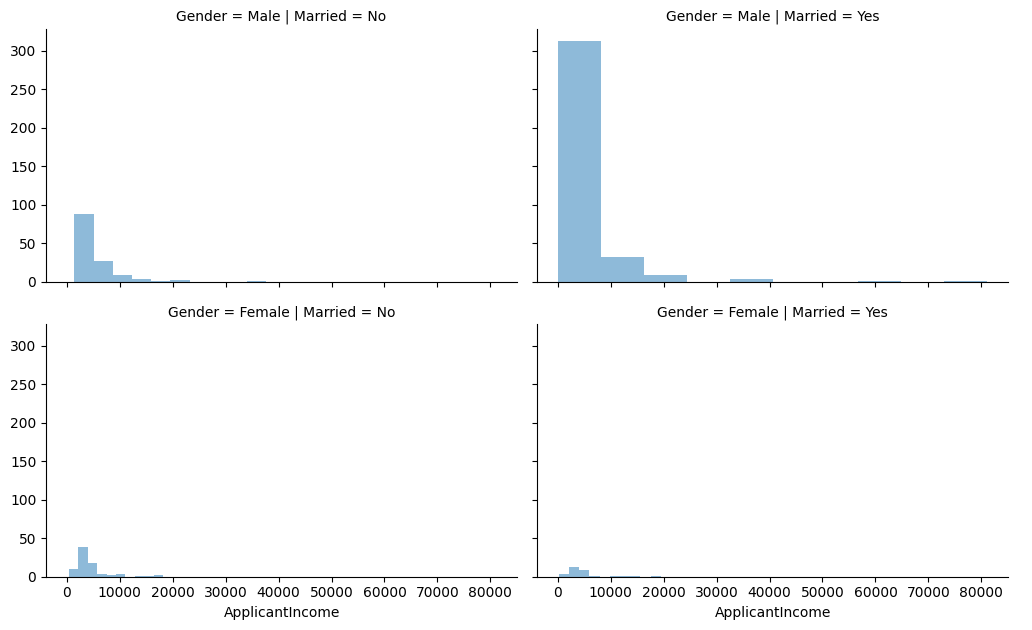

In [19]:
import matplotlib.pyplot as plt
grid = sns.FacetGrid(train, row='Gender', col='Married', height=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [20]:
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])

In [21]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

<ipython-input-21-54017d2d16d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)


In [22]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

<ipython-input-22-afd59976b687>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)


In [23]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

<ipython-input-23-f02779efc818>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


In [24]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

<ipython-input-24-b5b74282713c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)


In [25]:
train['Credit_History'].skew()

np.float64(-1.8823610612186696)

In [26]:
train.isna().sum()

,0
Gender,13
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,50


In [27]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for col in feature_col:
    train[col] = le.fit_transform(train[col])

In [28]:
train.Loan_Status = train.Loan_Status.replace({"Y": 1, "N" : 0})

<ipython-input-28-92b0e0b1b9aa>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.Loan_Status = train.Loan_Status.replace({"Y": 1, "N" : 0})


In [29]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [30]:
train['total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [31]:
train.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

In [32]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,1,0,0,0,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,2,1,3000.0


In [35]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'total_income'],
      dtype='object')

In [34]:
rel_feat =['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'total_income','Loan_Status']

In [33]:
rel_feat_corr = train.corr()['Loan_Status'][['Gender', 'Married', 'Dependents', 'Education',
'Self_Employed', 'LoanAmount', 'Loan_Amount_Term','Credit_History', 'Property_Area', 'total_income']]

In [36]:
rel_feat_corr

,Loan_Status
Gender,0.008690
Married,0.091478
Dependents,0.010118
Education,-0.085884
Self_Employed,-0.003700
LoanAmount,-0.033214
Loan_Amount_Term,-0.022549
Credit_History,0.561678
Property_Area,0.032112
total_income,-0.031271


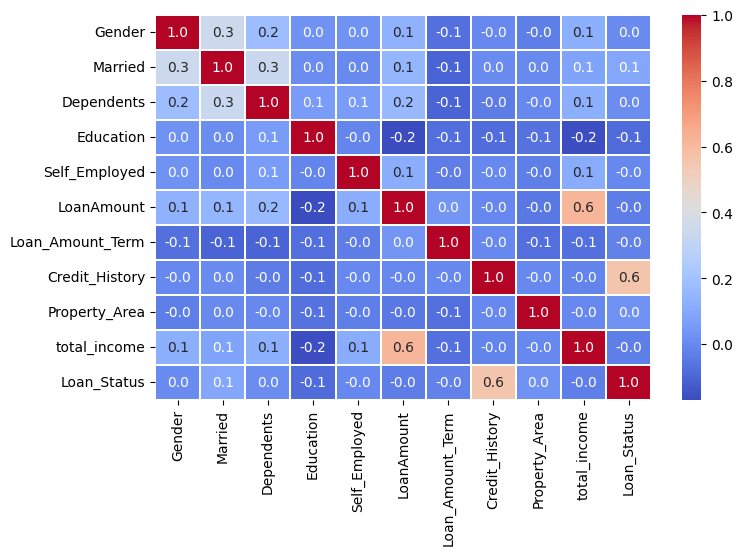

In [37]:
plt.figure(figsize=(8,5))
sns.heatmap(train[rel_feat].corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [38]:
#Separating target variable and other variables
X=train.drop(columns='Loan_Status')
y=train['Loan_Status']

In [39]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=7)

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf = rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test).astype(int)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print("Accuracy:",accuracy_score(y_test, rf_pred))

[[ 29  32]
 [  9 115]]
              precision    recall  f1-score   support

           0       0.76      0.48      0.59        61
           1       0.78      0.93      0.85       124

    accuracy                           0.78       185
   macro avg       0.77      0.70      0.72       185
weighted avg       0.78      0.78      0.76       185

Accuracy: 0.7783783783783784
